In [3529]:
%pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
%pip install opendatasets pandas numpy scikit-learn xgboost lightgbm tabulate category_encoders



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3530]:
## Importing the libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Loading the Training Data and using the Training Data to build the Model

## Data Loading

### Load Training

In [3531]:
df_train = pd.read_csv('C:/Users/anirb/Downloads/AIML/Restuarant_Rev_Prediction/Train_dataset.csv')
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Overall Restaurant Rating,Live Music Rating,Comedy Gigs Rating,Value Deals Rating,Live Sports Rating,Ambience,Lively,Service,Comfortablility,Privacy
0,60001,42000000,"indian,irish",Bangalore,Near Business Hub,14-02-2009,84.3,Not Specific,95.8,1,...,10.0,4.0,NaN,NaN,NaN,8.0,8,6,6,6
1,60002,50000000,"indian,irish",Indore,Near Party Hub,29-09-2008,85.4,Tier A Celebrity,85.0,1,...,9.0,NaN,4.0,NaN,NaN,5.0,7,7,3,8
2,60003,32500000,"tibetan,italian",Chennai,Near Business Hub,30-07-2011,85.0,Tier A Celebrity,68.2,1,...,8.0,3.0,NaN,NaN,NaN,7.0,10,5,2,8
3,60004,110000000,"turkish,nigerian",Gurgaon,Near Party Hub,30-11-2008,85.6,Tier A Celebrity,83.6,0,...,9.0,6.0,NaN,NaN,NaN,7.0,7,4,3,5
4,60005,20000000,"irish,belgian",Manesar,Near Party Hub,22-02-2010,NaN,Tier A Celebrity,76.8,1,...,6.0,NaN,2.0,NaN,NaN,NaN,6,2,4,6


In [3532]:
#Convert Annual Turnover to Log
df_train['Annual Turnover'] = np.log1p(df_train['Annual Turnover'])



### Load Test

In [3533]:
df_test = pd.read_csv('C:/Users/anirb/Downloads/AIML/Restuarant_Rev_Prediction/Test_dataset.csv')
df_test = df_test.rename(columns={'Endoresed By':'Endorsed By'})


## Data Cleanup

### Fix City

In [3534]:
df_train.loc[df_train['City'].isin((df_train['City'].value_counts()[df_train['City'].value_counts() < 1]).index), 'City'] = 'OTHER'
df_train['City'] = df_train['City'].replace('-1', 'OTHER')

df_train.groupby(['City'],dropna=False).size().sort_values(ascending=False)
df_test.loc[df_test['City'].isin((df_test['City'].value_counts()[df_test['City'].value_counts() < 6]).index), 'City'] = 'OTHER'
df_test['City'] = df_test['City'].replace('-1', 'OTHER')



In [3535]:
replacement_pattern = r"^(BANGALORE|BANGLORE|BENGALURU)$"  # Consider using raw string for regex

# Replace matching values with 'BANGALORE' (case-sensitive)
df_train['City'] = df_train['City'].str.replace(replacement_pattern, 'BANGALORE')
df_test['City'] = df_test['City'].str.replace(replacement_pattern, 'BANGALORE')


replacement_pattern = r"^(BHUBANESHWAR|BHUBANESWAR)$"  # Consider using raw string for regex
df_train['City'] = df_train['City'].str.replace(replacement_pattern, 'BHUBANESHWAR')
df_test['City'] = df_test['City'].str.replace(replacement_pattern, 'BHUBANESHWAR')


replacement_pattern = r"^(TRIVANDRUM|THIRUVANANTHAPURAM|THIRUVANANTHAPURAM)$"  # Consider using raw string for regex
df_train['City'] = df_train['City'].str.replace(replacement_pattern, 'TRIVANDRUM')
df_test['City'] = df_test['City'].str.replace(replacement_pattern, 'TRIVANDRUM')


C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\2774619740.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['City'] = df_train['City'].str.replace(replacement_pattern, 'BANGALORE')
C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\2774619740.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['City'] = df_test['City'].str.replace(replacement_pattern, 'BANGALORE')
C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\2774619740.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df_train['City'] = df_train['City'].str.replace(replacement_pattern, 'BHUBANESHWAR')
C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\2774619740.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['City'] = df_test['City'].str.replace(replacement_pattern, 'BHUBANESHWAR')
C:\Users\anirb\Ap

In [3536]:
df_train['City'] = df_train['City'].str.upper().str.strip()
df_train['City'].value_counts().sort_values(ascending=False)
#df_train['City'].value_counts()/len(df_train['City'])*100

BANGALORE    585
OTHER        396
NOIDA        345
HYDERABAD    325
PUNE         295
            ... 
KURNOOL        1
KOLHAPUR       1
BHILAI         1
HDERABAD       1
PONDY          1
Name: City, Length: 203, dtype: int64

In [3537]:
df_test['City'] = df_test['City'].str.upper().str.strip()
df_test['City'].value_counts().sort_values(ascending=False)

OTHER          186
BANGALORE       74
NOIDA           44
HYDERABAD       40
CHENNAI         28
PUNE            28
GURGAON         24
NEW DELHI       20
MUMBAI          18
NAVI MUMBAI     10
JAIPUR          10
KOLKATA         10
LUCKNOW          8
Name: City, dtype: int64

In [3538]:
# df_train.groupby(['City'],dropna=False).size().sort_values(ascending=False)

In [3539]:
# df_test.groupby(['City'],dropna=False).size().sort_values(ascending=False)


### Group Theme

In [3540]:
df_train['Restaurant Theme'].nunique()

34

In [3541]:
#df_train.groupby(['Restaurant Theme'],dropna=False).size()


df_train.loc[df_train['Restaurant Theme'].isin((df_train['Restaurant Theme'].value_counts()[df_train['Restaurant Theme'].value_counts() < 1]).index), 'Restaurant Theme'] = 'Other'

df_train['Restaurant Theme'].value_counts()


Arabian      1373
Greek        1030
90's          584
Nature        179
Parsi         103
Chinese        74
Delicio        23
Molino         22
English        19
Belise         14
Downtown       10
Moonrise       10
Mise En         7
TheGem          6
Carbone         4
Petit           4
Marco           4
Umami           3
Benedicta       3
Picante         3
Bettaso         2
Resca           2
Savory          2
Cafepro         2
Sage            1
Piquant         1
Flavors         1
Grand           1
Cinnamon        1
Spoon           1
LaCuisine       1
Italica         1
Bakery          1
Ambiance        1
Name: Restaurant Theme, dtype: int64

In [3542]:
df_test.loc[df_test['Restaurant Theme'].isin((df_test['Restaurant Theme'].value_counts()[df_test['Restaurant Theme'].value_counts() < 1]).index), 'Restaurant Theme'] = 'Other'
df_test['Restaurant Theme'].value_counts()


Arabian      219
Greek        133
90's          75
Nature        22
Parsi         18
Chinese        8
Molino         7
Delicio        4
Moonrise       3
Carbone        2
Mise En        2
Belise         1
Petit          1
Picante        1
English        1
Ambiance       1
Marco          1
Benedicta      1
Name: Restaurant Theme, dtype: int64

In [3543]:
df_test.groupby(['Restaurant Theme'],dropna=False).size()

Restaurant Theme
90's          75
Ambiance       1
Arabian      219
Belise         1
Benedicta      1
Carbone        2
Chinese        8
Delicio        4
English        1
Greek        133
Marco          1
Mise En        2
Molino         7
Moonrise       3
Nature        22
Parsi         18
Petit          1
Picante        1
dtype: int64

In [3544]:
## Checking for the null values
df_train.isnull().sum()

Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

### NaN Values Treatment

In [3545]:
null_columns = df_train.columns[df_train.isna().any()]

# Print the column names
print("Columns with missing values:", null_columns.tolist())

Columns with missing values: ['Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Resturant Tier', 'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating', 'Ambience']


#### Mean Treater

In [3546]:
# # ## Fill with Mean values
df_train=df_train.fillna(df_train.mean())
df_test=df_test.fillna(df_test.mean())


C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\3274484928.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train=df_train.fillna(df_train.mean())
C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\3274484928.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_test=df_test.fillna(df_test.mean())


#### Imputer

In [3547]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# train_imputer = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=37)
# test_imputer = IterativeImputer(max_iter=30, missing_values=0, sample_posterior=True, min_value=1, random_state=37)

# df_train = train_imputer.fit_transform(df_train)
# df_test = train_imputer.fit_transform(df_test)

# df_train
# 'Facebook Popularity Quotient', 'Instagram Popularity Quotient', 'Resturant Tier', 'Overall Restaurant Rating', 'Live Music Rating', 'Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating', 'Ambience'

C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\2704971480.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data


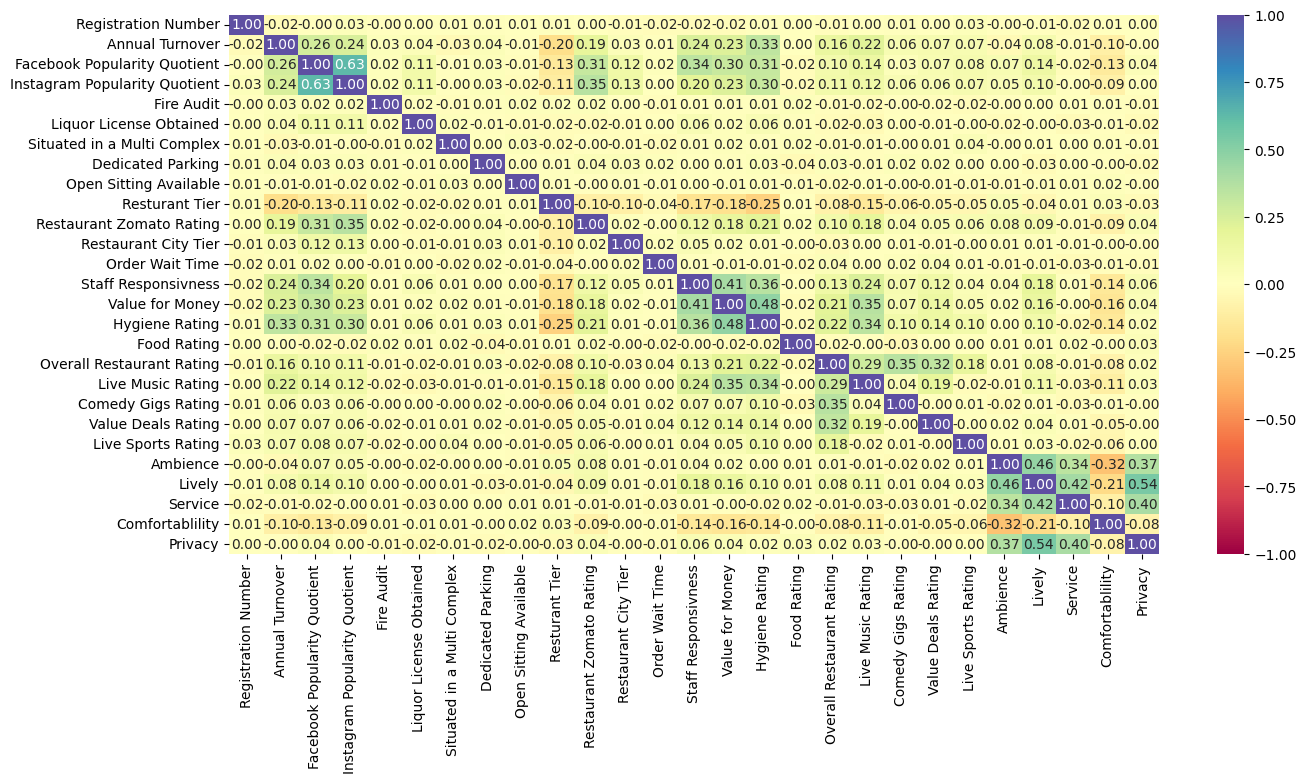

In [3548]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

### Column Dropping due to High Correl

In [3549]:
## These columns have a high % of values as NaN , hence ignoring them



columns_to_drop = ['Comedy Gigs Rating','Value Deals Rating','Live Sports Rating']
df_train  = df_train.drop(columns_to_drop, axis=1, inplace=False) 
df_test  = df_test.drop(columns_to_drop, axis=1, inplace=False) 

C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\2704971480.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data


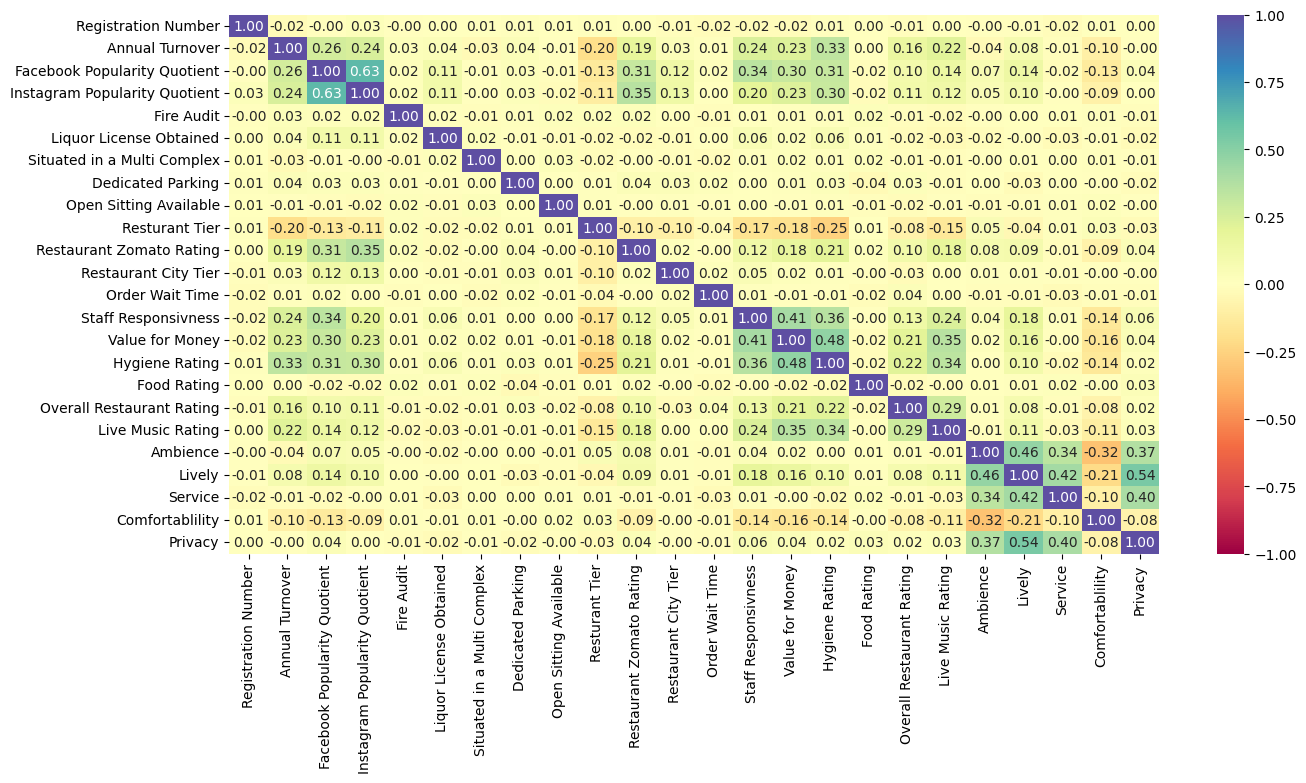

In [3550]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

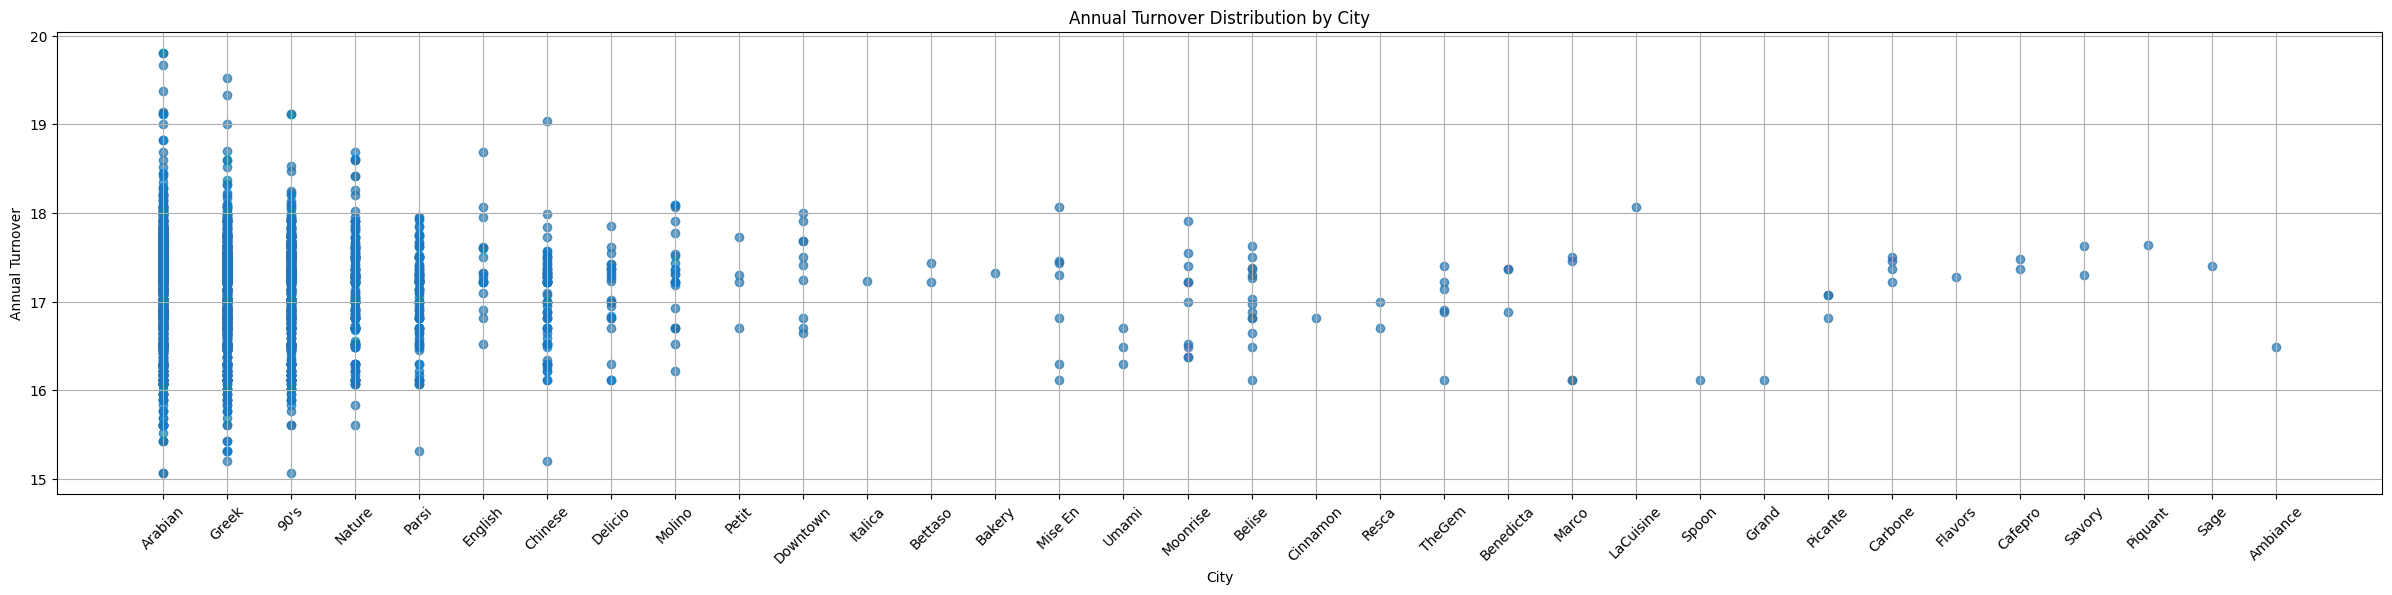

In [3551]:
plt.figure(figsize=(30, 6))
plt.scatter(df_train['Restaurant Theme'], df_train['Annual Turnover'], alpha=0.7)
plt.xlabel('City')
plt.ylabel('Annual Turnover')
plt.title('Annual Turnover Distribution by City')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

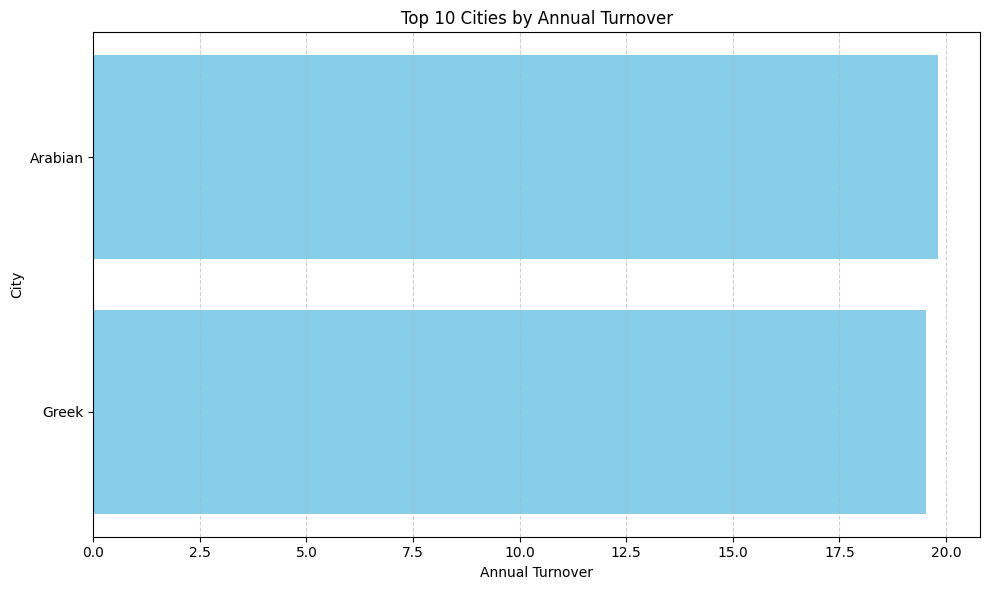

In [3552]:
top_10_cities = df_train.sort_values(by='Annual Turnover', ascending=False).head(10)

# Extract data for plotting
cities = top_10_cities['Restaurant Theme'].to_numpy()
turnovers = top_10_cities['Annual Turnover'].to_numpy()

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.barh(cities, turnovers, color='skyblue')  # Horizontal bar chart
plt.xlabel('Annual Turnover')
plt.ylabel('City')
plt.title('Top 10 Cities by Annual Turnover')
plt.gca().invert_yaxis()  # Invert y-axis to display top city at the top

# Optional: Customize plot
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid lines

plt.tight_layout()
plt.show()

C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\2704971480.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data


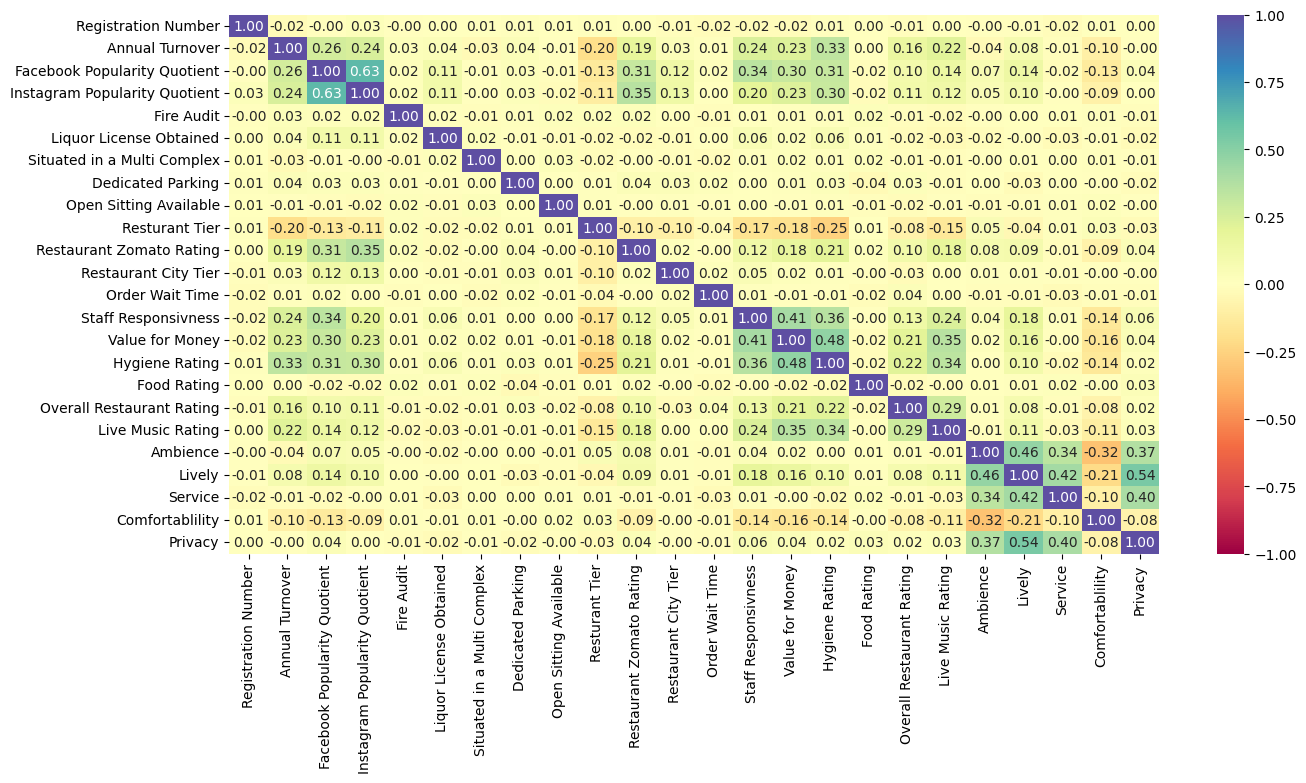

In [3553]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

## Encode Values to Numeric

### City Treatment

#### frequency encoding

In [3554]:
# enc_nom_train = (df_train.groupby('City').size()) / len(df_train)
# enc_nom_test = (df_test.groupby('City').size()) / len(df_test)
# df_train['City_encode'] = df_train['City'].apply(lambda x : enc_nom_train[x])
# df_test['City_encode'] = df_test['City'].apply(lambda x : enc_nom_test[x])

#### Target Encoding

In [3555]:
import category_encoders as ce
encoder = ce.TargetEncoder()
df_train['City_target_encoding'] = encoder.fit_transform(df_train['City'], df_train['Annual Turnover'])


In [3556]:
# Assuming City_encoded in df_train has target means
df_target_encoding = df_train[['City_target_encoding', 'City']]  # Optional: Select relevant columns

df_train_without_duplicates = df_target_encoding.drop_duplicates()
df_train_without_duplicates

# Assuming City_target_encoding exists in df_train_without_duplicates
city_target_means = df_train_without_duplicates.set_index('City')['City_target_encoding'].to_dict()

# Example usage on df_test (replace with your actual usage)
df_test['City_target_encoding'] = df_test['City'].replace(city_target_means)

df_test.head()

,Registration Number,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy,City_target_encoding
0,20001,"tibetan,italian",BANGALORE,Near Business Hub,13-07-2010,78.00,Tier A Celebrity,69.00,1,1,...,5,8,6.000000,4.032663,5,2,2,6,0,17.263762
1,20002,"tibetan,italian",HYDERABAD,Near Party Hub,05-09-2011,89.17,Not Specific,96.00,1,1,...,6,8,9.000000,3.000000,7,8,5,1,8,17.110160
2,20003,"algerian,belgian",HYDERABAD,Near Party Hub,12-04-2011,84.00,Not Specific,86.00,1,1,...,6,9,6.000000,3.000000,9,7,5,1,5,17.110160
3,20004,"tibetan,greek",OTHER,Near Party Hub,16-01-2005,79.38,Not Specific,74.40,0,1,...,5,9,9.000000,6.000000,6,7,6,4,7,17.075331
4,20005,"cuban,british",OTHER,Near Party Hub,10-11-2008,84.67,Not Specific,86.46,1,1,...,7,8,8.469957,4.032663,4,4,7,7,3,17.075331


In [3557]:
df_train.head(100)

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy,City_target_encoding
0,60001,17.553180,"indian,irish",BANGALORE,Near Business Hub,14-02-2009,84.300000,Not Specific,95.8,1,...,5,7,10.0,4.00000,8.00000,8,6,6,6,17.263762
1,60002,17.727534,"indian,irish",INDORE,Near Party Hub,29-09-2008,85.400000,Tier A Celebrity,85.0,1,...,7,8,9.0,4.01283,5.00000,7,7,3,8,16.934606
2,60003,17.296751,"tibetan,italian",CHENNAI,Near Business Hub,30-07-2011,85.000000,Tier A Celebrity,68.2,1,...,3,7,8.0,3.00000,7.00000,10,5,2,8,17.088360
3,60004,18.515991,"turkish,nigerian",GURGAON,Near Party Hub,30-11-2008,85.600000,Tier A Celebrity,83.6,0,...,6,8,9.0,6.00000,7.00000,7,4,3,5,17.143625
4,60005,16.811243,"irish,belgian",MANESAR,Near Party Hub,22-02-2010,77.938715,Tier A Celebrity,76.8,1,...,4,8,6.0,4.01283,6.42301,6,2,4,6,17.046858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60096,17.565015,"tibetan,italian",HYDERABAD,Near Business Hub,05-08-2009,83.500000,Not Specific,94.2,1,...,4,6,10.0,4.00000,8.00000,9,4,5,8,17.110160
96,60097,17.622173,"tibetan,greek",BANGALORE,Near Party Hub,21-03-2007,65.000000,Tier A Celebrity,66.0,1,...,5,8,10.0,4.00000,5.00000,7,2,2,9,17.263762
97,60098,17.216708,"welsh,thai",BANGALORE,Near Business Hub,26-04-2011,88.000000,Not Specific,88.0,1,...,6,8,10.0,4.00000,8.00000,9,8,4,7,17.263762
98,60099,17.665658,"peruvian,cuban",JAIPUR,Near Party Hub,06-10-2007,77.938715,Tier A Celebrity,76.6,1,...,4,6,10.0,4.00000,6.42301,5,5,2,6,16.936703


###  Endorsed By

In [3558]:
df_test['Endorsed By'].unique()

array(['Tier A Celebrity', 'Not Specific', 'Local Celebrity'],
      dtype=object)

#### Ordinal Encoding


In [3559]:

# from sklearn.preprocessing import OrdinalEncoder
# #enc = OrdinalEncoder(categories=[['Not Specific','Local Celebrity','Tier A Celebrity']])
# endorsement_order = ['Not Specific','Local Celebrity','Tier A Celebrity']
# # Create OrdinalEncoder with categories
# encoder = OrdinalEncoder(categories=[endorsement_order])
# # Fit and transform OrdinalEncoder
# df_train['Endorsed By_encoded'] = encoder.fit_transform(df_train[['Endorsed By']])
# df_test['Endorsed By_encoded'] = encoder.fit_transform(df_test[['Endorsed By']])


In [3560]:
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Endorsed By,Instagram Popularity Quotient,Fire Audit,...,Hygiene Rating,Food Rating,Overall Restaurant Rating,Live Music Rating,Ambience,Lively,Service,Comfortablility,Privacy,City_target_encoding
0,60001,17.553180,"indian,irish",BANGALORE,Near Business Hub,14-02-2009,84.300000,Not Specific,95.8,1,...,5,7,10.0,4.00000,8.00000,8,6,6,6,17.263762
1,60002,17.727534,"indian,irish",INDORE,Near Party Hub,29-09-2008,85.400000,Tier A Celebrity,85.0,1,...,7,8,9.0,4.01283,5.00000,7,7,3,8,16.934606
2,60003,17.296751,"tibetan,italian",CHENNAI,Near Business Hub,30-07-2011,85.000000,Tier A Celebrity,68.2,1,...,3,7,8.0,3.00000,7.00000,10,5,2,8,17.088360
3,60004,18.515991,"turkish,nigerian",GURGAON,Near Party Hub,30-11-2008,85.600000,Tier A Celebrity,83.6,0,...,6,8,9.0,6.00000,7.00000,7,4,3,5,17.143625
4,60005,16.811243,"irish,belgian",MANESAR,Near Party Hub,22-02-2010,77.938715,Tier A Celebrity,76.8,1,...,4,8,6.0,4.01283,6.42301,6,2,4,6,17.046858


#### OHE

In [3561]:
# from sklearn.preprocessing import LabelEncoder
 
# # Creating a instance of label Encoder.
# le = LabelEncoder()
 
# # Using .fit_transform function to fit label
# # encoder and return encoded label
# df_train['Endorsed By LE'] = le.fit_transform(df_train['Endorsed By'])
# df_test['Endorsed By LE'] = le.fit_transform(df_test['Endorsed By'])
 
# # printing label
# df_train['Endorsed By LE'].unique()
df_train = pd.concat([df_train.drop('Endorsed By', 1), df_train['Endorsed By'].str.get_dummies()], 1)
df_test = pd.concat([df_test.drop('Endorsed By', 1), df_test['Endorsed By'].str.get_dummies()], 1)

C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\115344029.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = pd.concat([df_train.drop('Endorsed By', 1), df_train['Endorsed By'].str.get_dummies()], 1)
C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\115344029.py:13: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_train = pd.concat([df_train.drop('Endorsed By', 1), df_train['Endorsed By'].str.get_dummies()], 1)
C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\115344029.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = pd.concat([df_test.drop('Endorsed By', 1), df_test['Endorsed By'].str.get_dummies()], 1)
C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\115344029.py:14: FutureWarning: In a future version of

###  Restaurant Location

In [3562]:
df_test['Restaurant Location'].unique()

array(['Near Business Hub', 'Near Party Hub'], dtype=object)

#### OHE

In [3563]:
# df_train = pd.concat([df_train.drop('Restaurant Location', 1), df_train['Restaurant Location'].str.get_dummies()], 1)
# df_test = pd.concat([df_test.drop('Restaurant Location', 1), df_test['Restaurant Location'].str.get_dummies()], 1)

#### Label Encoding

In [3564]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Restaurant Location LE'] = le.fit_transform(df_train['Restaurant Location'])
df_test['Restaurant Location LE'] = le.fit_transform(df_test['Restaurant Location'])

# printing label
df_train['Restaurant Location LE'].unique()

array([0, 1])

### Restaurant Type

In [3565]:
df_train['Restaurant Type'].value_counts()


Bar                         3235
Caffee                       212
Gastro Bar                    45
Buffet/Family Restaurant       1
Name: Restaurant Type, dtype: int64

#### OHE

In [3566]:
# Using .fit_transform function to fit label
# encoder and return encoded label
# df_train['Restaurant Type LE'] = le.fit_transform(df_train['Restaurant Type'])
# df_test['Restaurant Type LE'] = le.fit_transform(df_test['Restaurant Type'])
 
# # printing label
# df_train['Restaurant Type LE'].unique()

df_train = pd.concat([df_train.drop('Restaurant Type', 1), df_train['Restaurant Type'].str.get_dummies()], 1)
df_test = pd.concat([df_test.drop('Restaurant Type', 1), df_test['Restaurant Type'].str.get_dummies()], 1)

C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\3805653904.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_train = pd.concat([df_train.drop('Restaurant Type', 1), df_train['Restaurant Type'].str.get_dummies()], 1)
C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\3805653904.py:9: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_train = pd.concat([df_train.drop('Restaurant Type', 1), df_train['Restaurant Type'].str.get_dummies()], 1)
C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\3805653904.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = pd.concat([df_test.drop('Restaurant Type', 1), df_test['Restaurant Type'].str.get_dummies()], 1)
C:\Users\anirb\AppData\Local\Temp\ipykernel_25716\3805653904.py:10: FutureWarni

#### Frequency Encoding


In [3567]:
# enc_nom_train = (df_train.groupby('Restaurant Type').size()) / len(df_train)


# enc_nom_test = (df_test.groupby('Restaurant Type').size()) / len(df_test)

# df_train['Restaurant Type'] = df_train['Restaurant Type'].apply(lambda x : enc_nom_train[x])
# df_test['Restaurant Type'] = df_test['Restaurant Type'].apply(lambda x : enc_nom_test[x])

#### Target Encoding

In [3568]:
# import category_encoders as ce
# encoder = ce.TargetEncoder()
# df_train['Restaurant Type Encoding'] = encoder.fit_transform(df_train['Restaurant Type'], df_train['Annual Turnover'])
# df_train.head()

In [3569]:
# # Encode Test with Same values
# df_target_encoding = df_train[['Restaurant Type Encoding', 'Restaurant Type']]  # Optional: Select relevant columns

# df_train_without_duplicates = df_target_encoding.drop_duplicates()


# # Assuming City_target_encoding exists in df_train_without_duplicates
# city_target_means = df_train_without_duplicates.set_index('Restaurant Type')['Restaurant Type Encoding'].to_dict()

# # Example usage on df_test (replace with your actual usage)
# df_test['Restaurant Type Encoding'] = df_test['Restaurant Type'].replace(city_target_means)


### Restaurant Theme Encoding

In [3570]:
df_test['Restaurant Theme'].value_counts()


Arabian      219
Greek        133
90's          75
Nature        22
Parsi         18
Chinese        8
Molino         7
Delicio        4
Moonrise       3
Carbone        2
Mise En        2
Belise         1
Petit          1
Picante        1
English        1
Ambiance       1
Marco          1
Benedicta      1
Name: Restaurant Theme, dtype: int64

In [3571]:
df_train['Restaurant Theme'].value_counts()


Arabian      1373
Greek        1030
90's          584
Nature        179
Parsi         103
Chinese        74
Delicio        23
Molino         22
English        19
Belise         14
Downtown       10
Moonrise       10
Mise En         7
TheGem          6
Carbone         4
Petit           4
Marco           4
Umami           3
Benedicta       3
Picante         3
Bettaso         2
Resca           2
Savory          2
Cafepro         2
Sage            1
Piquant         1
Flavors         1
Grand           1
Cinnamon        1
Spoon           1
LaCuisine       1
Italica         1
Bakery          1
Ambiance        1
Name: Restaurant Theme, dtype: int64

In [3572]:
# Using .fit_transform function to fit label
# encoder and return encoded label
# df_train['Restaurant Theme LE'] = le.fit_transform(df_train['Restaurant Theme'])
# df_test['Restaurant Theme LE'] = le.fit_transform(df_test['Restaurant Theme'])
 
# # printing label
# df_train['Restaurant Theme LE'].unique()

# df_train = pd.concat([df_train.drop('Restaurant Theme', 1), df_train['Restaurant Theme'].str.get_dummies()], 1)
# df_test = pd.concat([df_test.drop('Restaurant Theme', 1), df_test['Restaurant Theme'].str.get_dummies()], 1)

#### Frequency Encoding

In [3573]:
# enc_nom_train = (df_train.groupby('Restaurant Theme').size()) / len(df_train)
# enc_nom_test = (df_test.groupby('Restaurant Theme').size()) / len(df_test)

# df_train['Restaurant Theme'] = df_train['Restaurant Theme'].apply(lambda x : enc_nom_train[x])
# df_test['Restaurant Theme'] = df_test['Restaurant Theme'].apply(lambda x : enc_nom_test[x])


#### Target Encoding

In [3574]:
import category_encoders as ce
encoder = ce.TargetEncoder()
df_train['Restaurant Theme Encoding'] = encoder.fit_transform(df_train['Restaurant Theme'], df_train['Annual Turnover'])

In [3575]:
# Encode Test with Same values
df_target_encoding = df_train[['Restaurant Theme Encoding', 'Restaurant Theme']]  # Optional: Select relevant columns

df_train_without_duplicates = df_target_encoding.drop_duplicates()
df_train_without_duplicates

# Assuming City_target_encoding exists in df_train_without_duplicates
city_target_means = df_train_without_duplicates.set_index('Restaurant Theme')['Restaurant Theme Encoding'].to_dict()

# Example usage on df_test (replace with your actual usage)
df_test['Restaurant Theme Encoding'] = df_test['Restaurant Theme'].replace(city_target_means)


In [3576]:
# df_train['City'].nunique()


In [3577]:
# # Using .fit_transform function to fit label
# # encoder and return encoded label
# df_train['City LE'] = le.fit_transform(df_train['City'])
# df_test['City LE'] = le.fit_transform(df_test['City'])
 
# # printing label
# df_train['City LE'].unique()

## Treat Cuisine Type

In [3578]:
df_test['Cuisine'].value_counts()


tibetan,greek          115
welsh,thai              58
indian,irish            45
british,japanese        44
tibetan,italian         33
chinese,salvadorian     27
algerian,belgian        21
turkish,nigerian        21
japanese,thai           19
peruvian,cuban          19
algerian,korean         19
cuban,british           15
turkish,sapnish         13
irish,belgian           10
polish,jewish           10
swedish,greek           10
hawaiian,latvian         9
algerian,algerian        5
nigerian,cajun           4
british,belgian          3
Name: Cuisine, dtype: int64

In [3579]:
df_train['Cuisine'].value_counts()


tibetan,greek          686
welsh,thai             345
tibetan,italian        278
indian,irish           273
british,japanese       271
turkish,nigerian       225
japanese,thai          204
chinese,salvadorian    159
algerian,belgian       155
turkish,sapnish        147
polish,jewish          117
peruvian,cuban         115
swedish,greek           92
irish,belgian           85
algerian,korean         83
cuban,british           81
algerian,algerian       67
hawaiian,latvian        46
british,belgian         40
nigerian,cajun          24
Name: Cuisine, dtype: int64

#### Frequency Encoding

In [3580]:
# enc_nom_train = (df_train.groupby('Cuisine').size()) / len(df_train)
# enc_nom_test = (df_test.groupby('Cuisine').size()) / len(df_test)
# df_train['Cuisine_encode'] = df_train['Cuisine'].apply(lambda x : enc_nom_train[x])
# df_test['Cuisine_encode'] = df_test['Cuisine'].apply(lambda x : enc_nom_test[x])


#### Label Encoding

In [3581]:
## Treating cuisine as Label Encoding
# df_train['Cuisine LE'] = le.fit_transform(df_train['Cuisine'])
# df_test['Cuisine LE'] = le.fit_transform(df_test['Cuisine'])
 
# # printing label
# # df_train['Cuisine LE'].nunique()


# # ## Treat Cuisine Type

# # df_train = pd.concat([df_train.drop('Cuisine', 1), df_train['Cuisine'].str.get_dummies(sep=",")], 1)
# # df_test = pd.concat([df_test.drop('Cuisine', 1), df_test['Cuisine'].str.get_dummies(sep=",")], 1)
# df_train.columns

#### Target Encoding

In [3582]:
import category_encoders as ce
encoder = ce.TargetEncoder()
df_train['Cuisine Encoding'] = encoder.fit_transform(df_train['Cuisine'], df_train['Annual Turnover'])

In [3583]:
# Encode Test with Same values
df_target_encoding = df_train[['Cuisine Encoding', 'Cuisine']]  # Optional: Select relevant columns

df_train_without_duplicates = df_target_encoding.drop_duplicates()
df_train_without_duplicates

# Assuming City_target_encoding exists in df_train_without_duplicates
city_target_means = df_train_without_duplicates.set_index('Cuisine')['Cuisine Encoding'].to_dict()

# Example usage on df_test (replace with your actual usage)
df_test['Cuisine Encoding'] = df_test['Cuisine'].replace(city_target_means)


In [3584]:
df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Opening Day of Restaurant,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,...,Local Celebrity,Not Specific,Tier A Celebrity,Restaurant Location LE,Bar,Buffet/Family Restaurant,Caffee,Gastro Bar,Restaurant Theme Encoding,Cuisine Encoding
0,60001,17.553180,"indian,irish",BANGALORE,Near Business Hub,14-02-2009,84.300000,95.8,1,1,...,0,1,0,0,1,0,0,0,17.095807,17.123873
1,60002,17.727534,"indian,irish",INDORE,Near Party Hub,29-09-2008,85.400000,85.0,1,1,...,0,0,1,1,1,0,0,0,17.067232,17.123873
2,60003,17.296751,"tibetan,italian",CHENNAI,Near Business Hub,30-07-2011,85.000000,68.2,1,1,...,0,0,1,0,1,0,0,0,17.103626,17.140533
3,60004,18.515991,"turkish,nigerian",GURGAON,Near Party Hub,30-11-2008,85.600000,83.6,0,1,...,0,0,1,1,1,0,0,0,17.095807,17.186678
4,60005,16.811243,"irish,belgian",MANESAR,Near Party Hub,22-02-2010,77.938715,76.8,1,1,...,0,0,1,1,1,0,0,0,17.067232,16.758731


## Treat Date Field

In [3585]:
import datetime
df_train['Opening Day of Restaurant'].max()

df_train['Opening Day of Restaurant'] =  pd.to_datetime(df_train['Opening Day of Restaurant'], format='%d-%m-%Y')
df_test['Opening Day of Restaurant'] =  pd.to_datetime(df_test['Opening Day of Restaurant'], format='%d-%m-%Y')

launch_date = datetime.datetime(2015, 3, 23)
# scale days open
df_train['Days Open'] = (launch_date - df_train['Opening Day of Restaurant']).dt.days / 1000
df_test['Days Open'] = (launch_date - df_test['Opening Day of Restaurant']).dt.days / 1000
df_train.drop('Opening Day of Restaurant', axis=1, inplace=True)
df_test.drop('Opening Day of Restaurant', axis=1, inplace=True)

df_train.head()

,Registration Number,Annual Turnover,Cuisine,City,Restaurant Location,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,...,Not Specific,Tier A Celebrity,Restaurant Location LE,Bar,Buffet/Family Restaurant,Caffee,Gastro Bar,Restaurant Theme Encoding,Cuisine Encoding,Days Open
0,60001,17.553180,"indian,irish",BANGALORE,Near Business Hub,84.300000,95.8,1,1,1,...,1,0,0,1,0,0,0,17.095807,17.123873,2.228
1,60002,17.727534,"indian,irish",INDORE,Near Party Hub,85.400000,85.0,1,1,1,...,0,1,1,1,0,0,0,17.067232,17.123873,2.366
2,60003,17.296751,"tibetan,italian",CHENNAI,Near Business Hub,85.000000,68.2,1,1,1,...,0,1,0,1,0,0,0,17.103626,17.140533,1.332
3,60004,18.515991,"turkish,nigerian",GURGAON,Near Party Hub,85.600000,83.6,0,1,1,...,0,1,1,1,0,0,0,17.095807,17.186678,2.304
4,60005,16.811243,"irish,belgian",MANESAR,Near Party Hub,77.938715,76.8,1,1,1,...,0,1,1,1,0,0,0,17.067232,16.758731,1.855


In [3586]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   float64
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Facebook Popularity Quotient   3493 non-null   float64
 6   Instagram Popularity Quotient  3493 non-null   float64
 7   Fire Audit                     3493 non-null   int64  
 8   Liquor License Obtained        3493 non-null   int64  
 9   Situated in a Multi Complex    3493 non-null   int64  
 10  Dedicated Parking              3493 non-null   int64  
 11  Open Sitting Available         3493 non-null   int64  
 12  Resturant Tier                 3493 non-null   f

## Split Train and Test

In [3587]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, test_size=0.2, random_state=42)
len(train_df), len(val_df) , len(df_test)

(2794, 699, 500)

## Train and Validation Dataset

In [3588]:
target_col = 'Annual Turnover'
train_targets = train_df[target_col]
# Column to exclude
columns_to_exclude = ['Registration Number','Annual Turnover','City','Restaurant Location','Cuisine','Restaurant Theme','Cuisine']
# Select all columns except 'col2' (using drop with subset and inplace=False)

train_inputs  = train_df.drop(columns_to_exclude, axis=1, inplace=False)  # Keep original intact

val_inputs = val_df.drop(columns_to_exclude, axis=1, inplace=False)  
val_targets = val_df[target_col]

In [3589]:
columns_to_exclude_test = ['City','Restaurant Location','Cuisine','Restaurant Theme','Cuisine']
df_test = df_test.drop(columns_to_exclude_test, axis=1, inplace=False)  

In [3590]:
train_inputs.head()

,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,Restaurant City Tier,...,Not Specific,Tier A Celebrity,Restaurant Location LE,Bar,Buffet/Family Restaurant,Caffee,Gastro Bar,Restaurant Theme Encoding,Cuisine Encoding,Days Open
997,89.4,75.60,1,1,1,1,1,2.0,4,1,...,0,1,1,1,0,0,0,17.088738,17.123873,1.734
1566,79.4,75.91,1,1,1,1,1,2.0,3,0,...,1,0,1,1,0,0,0,17.103626,17.140533,2.079
1623,81.0,77.00,1,1,1,1,1,2.0,3,1,...,0,1,0,1,0,0,0,17.081815,17.078332,1.758
2691,62.8,60.00,0,1,1,0,1,2.0,3,0,...,1,0,1,1,0,0,0,17.095807,16.953455,2.459
1027,83.5,83.80,1,1,1,1,1,2.0,3,1,...,0,0,0,1,0,0,0,17.095807,16.955743,1.519


In [3591]:
cols = df_train.select_dtypes([np.int64,np.float64]).columns
print (cols)
df_train[cols].head()
df_train['Restaurant Theme'].head()


Index(['Registration Number', 'Annual Turnover',
       'Facebook Popularity Quotient', 'Instagram Popularity Quotient',
       'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time',
       'Staff Responsivness', 'Value for Money', 'Hygiene Rating',
       'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating',
       'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy',
       'City_target_encoding', 'Local Celebrity', 'Not Specific',
       'Tier A Celebrity', 'Bar', 'Buffet/Family Restaurant', 'Caffee',
       'Gastro Bar', 'Restaurant Theme Encoding', 'Cuisine Encoding',
       'Days Open'],
      dtype='object')


0    Arabian
1      Greek
2       90's
3    Arabian
4      Greek
Name: Restaurant Theme, dtype: object

### Scale

In [3639]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

numeric = ['Facebook Popularity Quotient', 'Instagram Popularity Quotient',
       'Resturant Tier',
 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy','Days Open', 'City_target_encoding','Restaurant Theme Encoding','Cuisine Encoding'
]

# Fit the MinMaxScaler to the training data
scaler.fit(train_inputs)

# Use the scaler to transform the training and test sets
train_inputs[numeric] = scaler.fit_transform(train_inputs[numeric])
val_inputs[numeric] = scaler.fit_transform(val_inputs[numeric])
# X_test_scaled = scaler.transform(val_inputs)
df_test[numeric]= scaler.fit_transform(df_test[numeric])

### PCA

In [3593]:
# from sklearn.decomposition import PCA
# import io

# # #https://www.geeksforgeeks.org/principal-component-analysis-with-python/



# pca = PCA(0.98)
# pca.fit(train_inputs)
# train_inputs = pca.fit_transform(train_inputs)
# val_inputs = pca.fit_transform(val_inputs)




# Try Different Models

## Linear Regression

In [3594]:
from sklearn.linear_model import LinearRegression
linreg_model = LinearRegression()
linreg_model.fit(train_inputs, train_targets)
LinearRegression()


LinearRegression()

In [3595]:
train_preds = linreg_model.predict(train_inputs)
val_preds = linreg_model.predict(val_inputs)

#row_61946 = val_inputs.loc[df_train['Registration Number'] == 61946]
#print(row_61946)
#val_preds_RN = linreg_model.predict(row_61946)
#validation_mse_RN = np.sqrt(mean_squared_error([22000000], val_preds_RN))
#print(validation_mse_RN)

In [3596]:
train_rmse_linreg = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_linreg = np.sqrt(mean_squared_error(val_preds, val_targets))
print(f'Train RMSE Linear Reg: {train_rmse_linreg:n}')
print(f'Test RMSE Linear Reg: {test_rmse_linreg:n}')
import matplotlib.pyplot as plt


Train RMSE Linear Reg: 0.45335
Test RMSE Linear Reg: 0.456801


## Ridge Linear Regression


In [3597]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


params_ridge = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
#    'normalize' : [True,False],
    'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_model = Ridge()
ridge_regressor = GridSearchCV(ridge_model, params_ridge, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
ridge_regressor.fit(train_inputs, train_targets)
# print(f'Optimal alpha: {ridge_regressor.best_params_["alpha"]:.2f}')
# print(f'Optimal fit_intercept: {ridge_regressor.best_params_["fit_intercept"]}')
# #print(f'Optimal normalize: {ridge_regressor.best_params_["normalize"]}')
# print(f'Optimal solver: {ridge_regressor.best_params_["solver"]}')
# print(f'Best score: {ridge_regressor.best_score_}')

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1, 5,
                                   10, 20],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             scoring='neg_root_mean_squared_error')

In [3598]:
ridge_model = Ridge(alpha=ridge_regressor.best_params_["alpha"], fit_intercept=ridge_regressor.best_params_["fit_intercept"], 
                    solver=ridge_regressor.best_params_["solver"])
ridge_model.fit(train_inputs, train_targets)
train_preds = ridge_model.predict(train_inputs)
val_preds = ridge_model.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse_ridge = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_ridge = np.sqrt(mean_squared_error(val_preds, val_targets))
print(f'Train RMSE Ridge: {train_rmse_ridge:n}')
print(f'Test RMSE Ridge: {test_rmse_ridge:n}')

Train r2 score:  -1.2325596089933342
Test r2 score:  0.30375945935107707
Train RMSE Ridge: 0.453395
Test RMSE Ridge: 0.455146


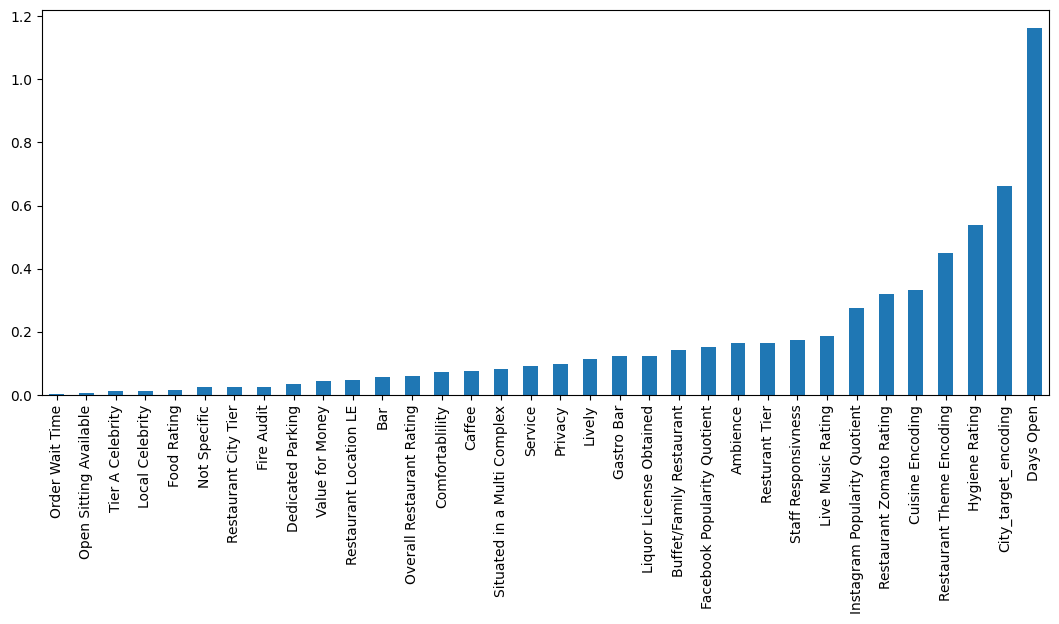

In [3599]:
# Lasso Model Feature Importance
lasso_feature_coef = pd.Series(index = train_inputs.columns, data = np.abs(ridge_model.coef_))
lasso_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

## Lasso Model

In [3600]:
params_lasso = {
    'alpha' : [.01, .1, .5, .7, .9, .95, .99, 1, 5, 10, 20],
    'fit_intercept' : [True, False],
}

lasso_model = Lasso()
lasso_regressor = GridSearchCV(lasso_model, params_lasso, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
lasso_regressor.fit(train_inputs, train_targets)
print(f'Optimal alpha: {lasso_regressor.best_params_["alpha"]:.2f}')
print(f'Optimal fit_intercept: {lasso_regressor.best_params_["fit_intercept"]}')
print(f'Best score: {lasso_regressor.best_score_}')

Optimal alpha: 0.01
Optimal fit_intercept: True
Best score: -0.4827063022842949


In [3601]:
lasso_model = Lasso(alpha=lasso_regressor.best_params_["alpha"], fit_intercept=lasso_regressor.best_params_["fit_intercept"], 
                    )
lasso_model.fit(train_inputs, train_targets)
train_preds = lasso_model.predict(train_inputs)
val_preds = lasso_model.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse_lasso = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_lasso = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse_lasso:.4f}')
print(f'Test RMSE: {test_rmse_lasso:.4f}')

Train r2 score:  -5.7709231654492665
Test r2 score:  0.24525963231520131
Train RMSE: 0.4813
Test RMSE: 0.4739


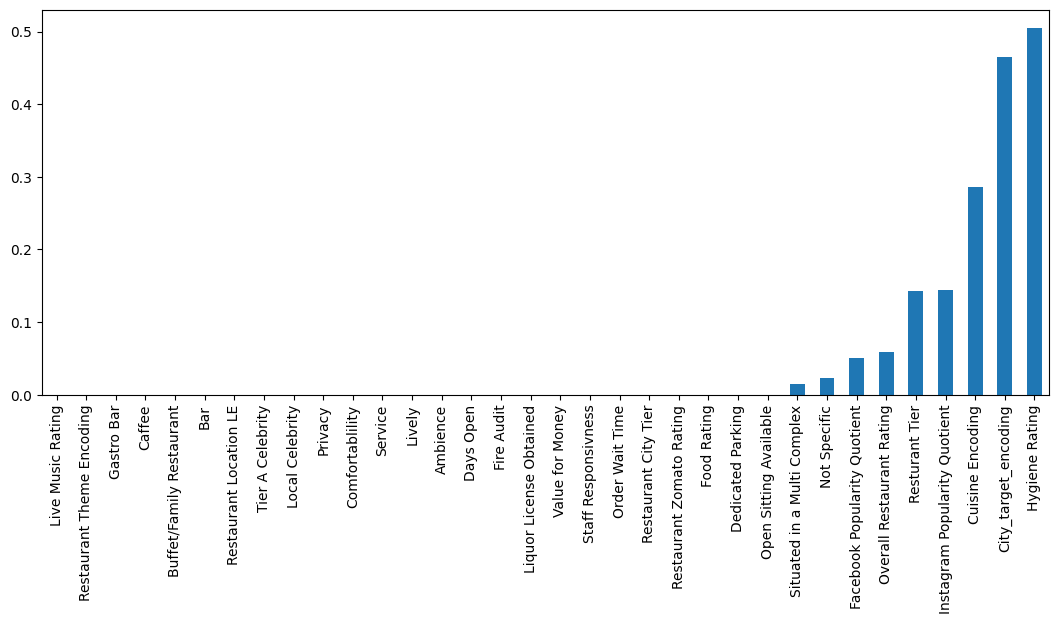

In [3602]:
# Lasso Model Feature Importance
lasso_feature_coef = pd.Series(index = train_inputs.columns, data = np.abs(lasso_model.coef_))
lasso_feature_coef.sort_values().plot(kind = 'bar', figsize = (13,5));

## XG Boost Model

In [3603]:
from xgboost import XGBRegressor, plot_importance
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler


params_xgb = {
    'learning_rate': [.1, .5, .7, .9, .95, .99, 1],
    'colsample_bytree': [.3, .4, .5, .6],
    'max_depth': [4],
    'alpha': [3],
    'subsample': [.5],
    'n_estimators': [30, 70, 100, 200]
}

xgb_model = XGBRegressor()
xgb_regressor = GridSearchCV(xgb_model, params_xgb, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
xgb_regressor.fit(train_inputs, train_targets)
print(f'Optimal lr: {xgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {xgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {xgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {xgb_regressor.best_score_}')

Optimal lr: 0.1
Optimal colsample_bytree: 0.4
Optimal n_estimators: 100
Best score: -0.45774548269435184


In [3604]:
xgb_model = XGBRegressor(learning_rate=xgb_regressor.best_params_["learning_rate"], 
                         colsample_bytree=xgb_regressor.best_params_["colsample_bytree"], 
                         max_depth=4, alpha=3, subsample=.5, 
                         n_estimators=xgb_regressor.best_params_["n_estimators"], n_jobs=-1)
xgb_model.fit(train_inputs, train_targets)

train_preds = xgb_model.predict(train_inputs)
val_preds = xgb_model.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse_xgb = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_xgb = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE XGB: {train_rmse_xgb:n}')
print(f'Test RMSE XGB: {test_rmse_xgb:n}')

Train r2 score:  -0.6373449124797164
Test r2 score:  0.30089948896298613
Train RMSE XGB: 0.401401
Test RMSE XGB: 0.45608


32 features with reduction of 5.88%


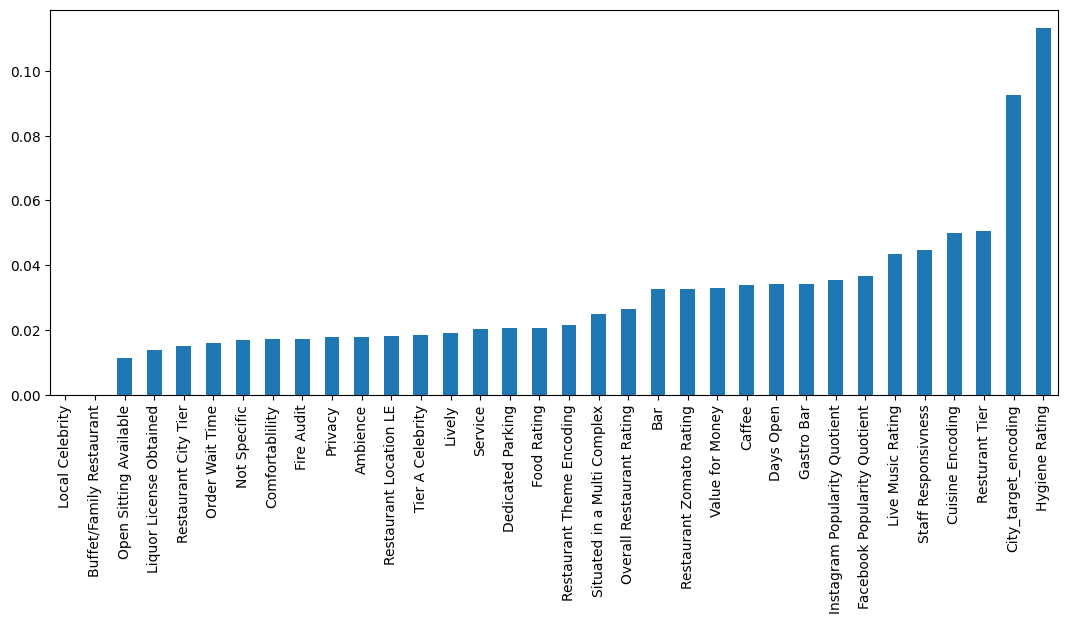

In [3605]:
# XG Forest Model Feature Importance
rf_feature_importance = pd.Series(index = train_inputs.columns, data = np.abs(xgb_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

## Random Forest Regressor

### Grid Search

In [3606]:
# from sklearn.ensemble import RandomForestRegressor

# params_rf = {
#     'max_depth': [10, 30, 35, 50, 65, 75, 100],
#     'max_features': [.3, .4, .5, .6],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [30, 50, 100, 200]
# }

# rf = RandomForestRegressor()
# rf_regressor = GridSearchCV(rf, params_rf, scoring='neg_root_mean_squared_error', cv = 10, n_jobs = -1)
# rf_regressor.fit(train_inputs, train_targets)
# print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
# print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
# print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
# print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
# print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
# print(f'Best score: {rf_regressor.best_score_}')

In [3607]:
# rf_model = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
#                                  max_features=rf_regressor.best_params_["max_features"], 
#                                  min_samples_leaf=rf_regressor.best_params_["min_samples_leaf"], 
#                                  min_samples_split=rf_regressor.best_params_["min_samples_split"], 
#                                  n_estimators=rf_regressor.best_params_["n_estimators"], 
#                                  n_jobs=-1, oob_score=True)
# rf_model.fit(train_inputs, train_targets)
# train_preds = rf_model.predict(train_inputs)
# val_preds = rf_model.predict(val_inputs)
# print('Train r2 score: ', r2_score(train_preds, train_targets))
# print('Test r2 score: ', r2_score(val_preds,val_targets ))
# train_rmse = np.sqrt(mean_squared_error(train_preds, train_targets))
# test_rmse = np.sqrt(mean_squared_error(val_targets, val_preds))
# print(f'Train RMSE: {train_rmse:n}')
# print(f'Test RMSE: {test_rmse:n}')

In [3608]:
# # Random Forest Model Feature Importance
# rf_feature_importance = pd.Series(index = train_inputs.columns, data = np.abs(rf_model.feature_importances_))
# n_features = (rf_feature_importance>0).sum()
# print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
# rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

### With RandomizedSearch instead of GridSearchCV

In [3609]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

params = {
    "n_estimators": randint(10,1000),
    "max_depth": randint(1,10),
    "min_samples_split": uniform(0.1,0.8),
    'max_features':['auto', 'sqrt', 'log2']
}

rf = RandomForestRegressor()
rf_regressor = RandomizedSearchCV(rf, params, scoring='neg_root_mean_squared_error', n_iter=100, cv = 6,  return_train_score=True, verbose=3, n_jobs=-1)
rf_regressor.fit(train_inputs, train_targets)
# print(f'Optimal depth: {rf_regressor.best_params_["max_depth"]}')
# print(f'Optimal max_features: {rf_regressor.best_params_["max_features"]}')
# print(f'Optimal min_sample_leaf: {rf_regressor.best_params_["min_samples_leaf"]}')
# print(f'Optimal min_samples_split: {rf_regressor.best_params_["min_samples_split"]}')
# print(f'Optimal n_estimators: {rf_regressor.best_params_["n_estimators"]}')
# print(f'Best score: {rf_regressor.best_score_}')

Fitting 6 folds for each of 100 candidates, totalling 600 fits


C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024C06E07E50>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024C0ECEFE90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024C0ECA3C90>},
                   return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=3)

In [3610]:
rf_model_random = RandomForestRegressor(max_depth=rf_regressor.best_params_["max_depth"], 
                                 max_features=rf_regressor.best_params_["max_features"], 
                                 min_samples_split=rf_regressor.best_params_["min_samples_split"], 
                                 n_estimators=rf_regressor.best_params_["n_estimators"], 
                                 n_jobs=-1, oob_score=True)
rf_model_random.fit(train_inputs, train_targets)
train_preds = rf_model_random.predict(train_inputs)
val_preds = rf_model_random.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_preds,val_targets ))
train_rmse_rf_random = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_rf_random = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse_rf_random:n}')
print(f'Test RMSE: {test_rmse_rf_random:n}')

C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Train r2 score:  -3.4246718944324988
Test r2 score:  -3.5051774792371972
Train RMSE: 0.474427
Test RMSE: 0.486416


24 features with reduction of 29.41%


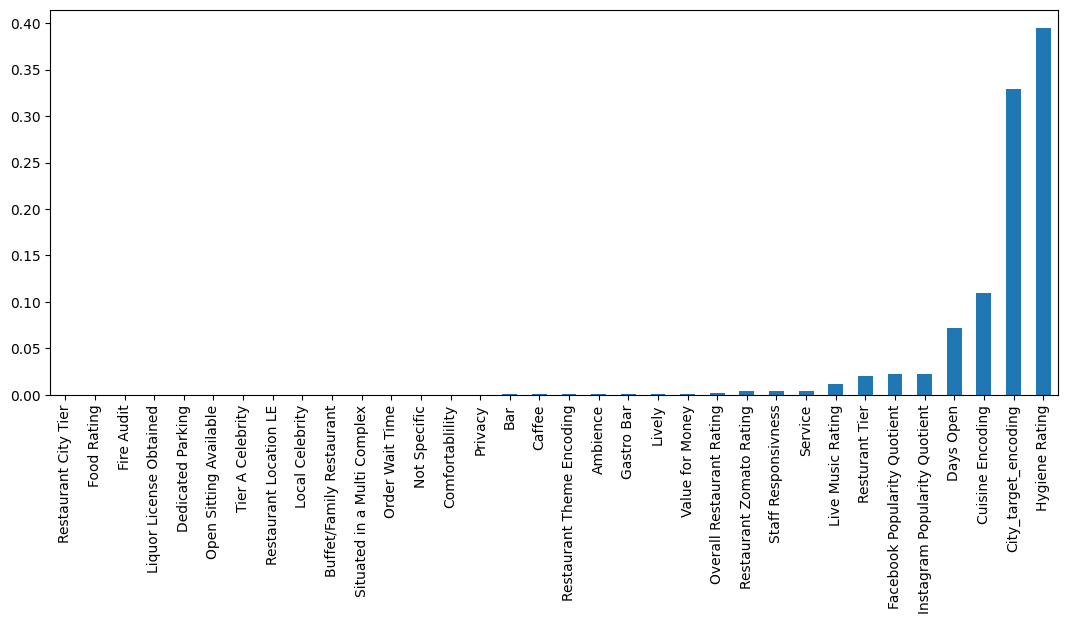

In [3611]:
# # Random Forest Model Feature Importance
rf_feature_importance = pd.Series(index = train_inputs.columns, data = np.abs(rf_model_random.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

## KNN Regressor

In [3612]:
from sklearn.neighbors import KNeighborsRegressor

params_knn = {
    'n_neighbors' : [3, 5, 7, 9, 11],
}

knn_model = KNeighborsRegressor()
knn_regressor = GridSearchCV(knn_model, params_knn, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)
knn_regressor.fit(train_inputs, train_targets)
print(f'Optimal neighbors: {knn_regressor.best_params_["n_neighbors"]}')
print(f'Best score: {knn_regressor.best_score_}')

Optimal neighbors: 11
Best score: -0.5199967021023923


In [3613]:
knn_model = KNeighborsRegressor(n_neighbors=knn_regressor.best_params_["n_neighbors"])
knn_model.fit(train_inputs, train_targets)
train_preds = knn_model.predict(train_inputs)
val_preds = knn_model.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse_knn = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_knn = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse_knn:n}')
print(f'Test RMSE: {test_rmse_knn:n}')

Train r2 score:  -3.3510666320057645
Test r2 score:  0.17518097609888506
Train RMSE: 0.474412
Test RMSE: 0.495394


## Light GBM

In [3614]:

import lightgbm as lgb
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

params = {
    "learning_rate": uniform(0.001,1),
    "n_estimators": randint(100,1000),
    "max_depth": randint(1,10),
    "colsample_bytree": uniform(0.1,0.8),
    "reg_alpha": [0.0001,0.001,0.01,0.1,1,10],
    "reg_lambda": [0.0001,0.001,0.01,0.1,1,10]
}

lgb_model = lgb.LGBMRegressor()
lgb_regressor = RandomizedSearchCV(lgb_model, params, cv=6, n_iter=100, scoring='neg_mean_squared_error', return_train_score=True, verbose=3, n_jobs=-1)
lgb_regressor.fit(train_inputs, train_targets)
print(f'Optimal lr: {lgb_regressor.best_params_["learning_rate"]}')
print(f'Optimal colsample_bytree: {lgb_regressor.best_params_["colsample_bytree"]}')
print(f'Optimal n_estimators: {lgb_regressor.best_params_["n_estimators"]}')
print(f'Best score: {lgb_regressor.best_score_}')

Fitting 6 folds for each of 100 candidates, totalling 600 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 2794, number of used features: 33
[LightGBM] [Info] Start training from score 17.086072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [3615]:
lgb_model = lgb.LGBMRegressor(learning_rate=lgb_regressor.best_params_["learning_rate"], 
                         colsample_bytree=lgb_regressor.best_params_["colsample_bytree"], 
                         max_depth=4, alpha=3, subsample=.5, 
                         n_estimators=lgb_regressor.best_params_["n_estimators"], n_jobs=-1)
lgb_model.fit(train_inputs, train_targets)
train_preds = lgb_model.predict(train_inputs)
val_preds = lgb_model.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse_lgb = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_lgb = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE XGB: {train_rmse_lgb:n}')
print(f'Test RMSE XGB: {test_rmse_lgb:n}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 2794, number of used features: 33
[LightGBM] [Info] Start training from score 17.086072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

32 features with reduction of 5.88%


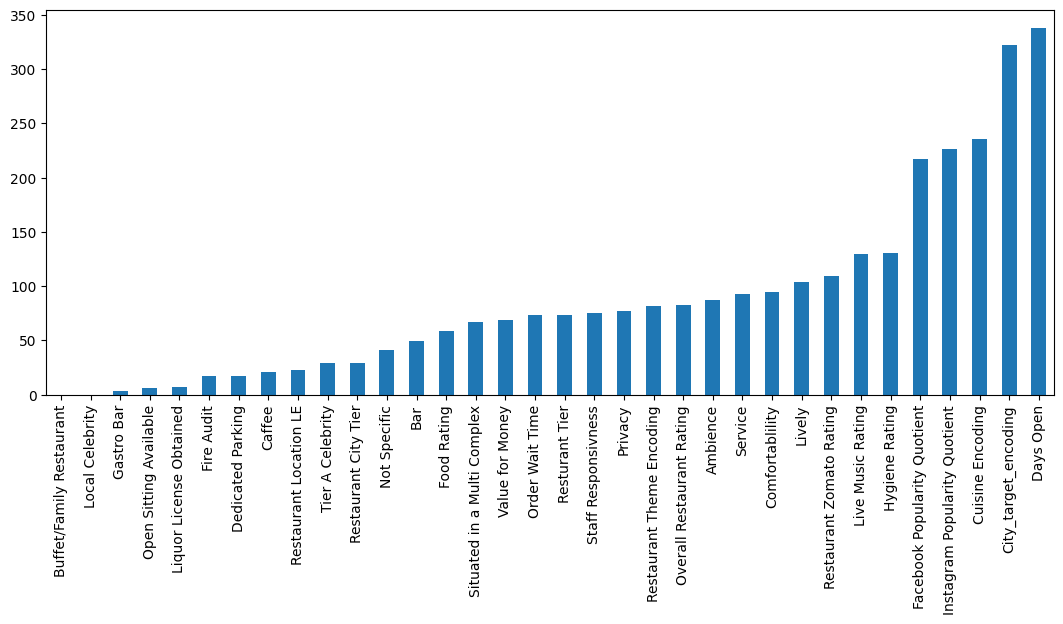

In [3616]:
# XG Forest Model Feature Importance
rf_feature_importance = pd.Series(index = train_inputs.columns, data = np.abs(lgb_model.feature_importances_))
n_features = (rf_feature_importance>0).sum()
print(f'{n_features} features with reduction of {(1-n_features/len(rf_feature_importance))*100:2.2f}%')
rf_feature_importance.sort_values().plot(kind = 'bar', figsize = (13,5));

## Stacking Regressor

### Stack 1 - Ridge Lasso RF

In [3617]:
rf_model_en = RandomForestRegressor(max_depth=200, max_features=0.4, min_samples_leaf=3, 
                                 min_samples_split=6, n_estimators=30, n_jobs=-1, oob_score=True)
rf_model_en.fit(train_inputs, train_targets)
train_preds = rf_model_en.predict(train_inputs)
val_preds = rf_model_en.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse_stack1 = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_stack1 = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse_stack1:.4f}')
print(f'Test RMSE: {test_rmse_stack1:.4f}')

Train r2 score:  0.4043154850309564
Test r2 score:  0.29394844360481587
Train RMSE: 0.2735
Test RMSE: 0.4583


In [3618]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

# # get a stacking ensemble of models
# def get_stacking():
#     # define the base models
#     base_models = list()
#     base_models.append(('ridge', ridge_model))
#     base_models.append(('lasso', lasso_model))
#     base_models.append(('rf', rf_model_en))
#     # define meta learner model
#     learner = LinearRegression()
#     # define the stacking ensemble
#     model = StackingRegressor(estimators=base_models, final_estimator=learner, cv=10)
#     return model
 
# # get a list of models to evaluate
# def get_models():
#     models = dict()
#     models['ridge'] = ridge_model
#     models['lasso'] = lasso_model
#     models['rf_en'] = rf_model_en
#     models['stacking'] = get_stacking()
#     return models
 
# # evaluate a given model using cross-validation
# def evaluate_model(model, X, y):
#     cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=19)
#     scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
#     return scores

# # get the models to evaluate
# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
#     scores = evaluate_model(model, train_inputs, train_targets)
#     results.append(scores)
#     names.append(name)
#     print(f'{name} {mean(scores):.3f} {std(scores):.3f}')
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()

In [3619]:
# define the base models
base_models = list()
base_models.append(('ridge', ridge_model))
base_models.append(('lasso', lasso_model))
base_models.append(('xgb', xgb_model))
base_models.append(('lgm', lgb_model))
# define meta learner model
learner = LinearRegression()
# define the stacking ensemble
stack1 = StackingRegressor(estimators=base_models, final_estimator=learner, cv=10)
# fit the model on all available data
stack1.fit(train_inputs, train_targets)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1029
[LightGBM] [Info] Number of data points in the train set: 2794, number of used features: 33
[LightGBM] [Info] Start training from score 17.086072
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

StackingRegressor(cv=10,
                  estimators=[('ridge', Ridge(alpha=0.99, solver='sag')),
                              ('lasso', Lasso(alpha=0.01)),
                              ('xgb',
                               XGBRegressor(alpha=3, base_score=None,
                                            booster=None, callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.4, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=N...
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=-1,
                                            num_parallel_tree=None, ...)),
                              ('lgm',
                               LGBMRegressor(alpha=3,
                                             colsample_bytree=0.4218477729559579,
                                             learning_rate=0.025569771345405945,
                                             max_depth=4, n_estimators=239,
                                             n_jobs=-1, subsample=0.5))],
                  final_estimator=LinearRegression())

In [3620]:
train_preds = stack1.predict(train_inputs)
val_preds = stack1.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse_stack1 = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_stack1 = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse_stack1:.4f}')
print(f'Test RMSE: {test_rmse_stack1:.4f}')

Train r2 score:  -0.7877120947102436
Test r2 score:  0.3262830327575359
Train RMSE: 0.4172
Test RMSE: 0.4477


### Stack 2 - RF 1 / 2 / 3

In [3621]:
# define the base models
base_model = list()
base_model.append(('rf1', rf_model_random))
base_model.append(('rf2', rf_model_en))
base_model.append(('rf3', RandomForestRegressor(max_depth=8, max_features=0.1, min_samples_leaf=3, 
                                                min_samples_split=2, n_estimators=250, n_jobs=-1, oob_score=False)))
# define meta learner model
learner = LinearRegression()
# define the stacking ensemble
stack2 = StackingRegressor(estimators=base_model, final_estimator=learner, cv=10)
# fit the model on all available data
stack2.fit(train_inputs, train_targets)

C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\anirb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

StackingRegressor(cv=10,
                  estimators=[('rf1',
                               RandomForestRegressor(max_depth=9,
                                                     max_features='auto',
                                                     min_samples_split=0.11900990901539076,
                                                     n_estimators=738,
                                                     n_jobs=-1,
                                                     oob_score=True)),
                              ('rf2',
                               RandomForestRegressor(max_depth=200,
                                                     max_features=0.4,
                                                     min_samples_leaf=3,
                                                     min_samples_split=6,
                                                     n_estimators=30, n_jobs=-1,
                                                     oob_score=True)),
                              ('rf3',
                               RandomForestRegressor(max_depth=8,
                                                     max_features=0.1,
                                                     min_samples_leaf=3,
                                                     n_estimators=250,
                                                     n_jobs=-1))],
                  final_estimator=LinearRegression())

In [3622]:
train_preds = stack2.predict(train_inputs)
val_preds = stack2.predict(val_inputs)
print('Train r2 score: ', r2_score(train_preds, train_targets))
print('Test r2 score: ', r2_score(val_targets, val_preds))
train_rmse_stack2 = np.sqrt(mean_squared_error(train_preds, train_targets))
test_rmse_stack2 = np.sqrt(mean_squared_error(val_targets, val_preds))
print(f'Train RMSE: {train_rmse_stack2:.4f}')
print(f'Test RMSE: {test_rmse_stack2:.4f}')

Train r2 score:  0.20713641166159769
Test r2 score:  0.31947886500403433
Train RMSE: 0.3133
Test RMSE: 0.4500


## Model Comparision

In [3623]:
from tabulate import tabulate 
#https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-table-style/
dict = {'Models'     : ['Linear Regression','Ridge Linear Regression','Lasso','XGB','RF -Random','KNN','LightGBM','Stack1','Stack2' ],
        'Train RMSE' : [train_rmse_linreg,train_rmse_ridge,train_rmse_lasso,train_rmse_xgb,train_rmse_rf_random,train_rmse_knn,train_rmse_lgb,train_rmse_stack1,train_rmse_stack2],
        'Test RMSE'  : [test_rmse_linreg,test_rmse_ridge,test_rmse_lasso,test_rmse_xgb,test_rmse_rf_random,test_rmse_knn,test_rmse_lgb,test_rmse_stack1,test_rmse_stack2]  
        }
df = pd.DataFrame(dict)
print(tabulate(df, headers = 'keys', tablefmt = 'psql')) 

+----+-------------------------+--------------+-------------+
|    | Models                  |   Train RMSE |   Test RMSE |
|----+-------------------------+--------------+-------------|
|  0 | Linear Regression       |     0.45335  |    0.456801 |
|  1 | Ridge Linear Regression |     0.453395 |    0.455146 |
|  2 | Lasso                   |     0.481286 |    0.473882 |
|  3 | XGB                     |     0.401401 |    0.45608  |
|  4 | RF -Random              |     0.474427 |    0.486416 |
|  5 | KNN                     |     0.474412 |    0.495394 |
|  6 | LightGBM                |     0.401428 |    0.454325 |
|  7 | Stack1                  |     0.41725  |    0.447724 |
|  8 | Stack2                  |     0.313326 |    0.449979 |
+----+-------------------------+--------------+-------------+


# Loading the Test Data and using the Test Data to Predict the target Variable

In [3624]:
df_test.head()

,Registration Number,Facebook Popularity Quotient,Instagram Popularity Quotient,Fire Audit,Liquor License Obtained,Situated in a Multi Complex,Dedicated Parking,Open Sitting Available,Resturant Tier,Restaurant Zomato Rating,...,Not Specific,Tier A Celebrity,Restaurant Location LE,Bar,Buffet/Family Restaurant,Caffee,Gastro Bar,Restaurant Theme Encoding,Cuisine Encoding,Days Open
0,20001,0.629921,0.438247,1,1,1,1,0,1.0,0.50,...,0,1,0,1,0,0,0,0.259112,0.727956,0.358588
1,20002,0.849803,0.976096,1,1,1,1,1,1.0,0.75,...,1,0,1,1,0,0,0,0.356586,0.727956,0.255183
2,20003,0.748031,0.776892,1,1,1,0,1,1.0,0.25,...,1,0,1,1,0,0,0,0.259112,0.609361,0.291214
3,20004,0.657087,0.545817,0,1,1,1,1,1.0,0.50,...,1,0,1,0,0,0,1,0.424063,0.963096,0.853159
4,20005,0.761220,0.786056,1,1,1,0,0,0.0,0.75,...,1,0,1,1,0,0,0,0.334494,0.366596,0.509131


In [3625]:
## Using the model built on the Training set to predict on the Test Set
df_test_for_prediction = df_test.drop('Registration Number',axis=1, inplace=False)
prediction_linreg = linreg_model.predict(df_test_for_prediction)
#prediction_rf = rf_model.predict(df_test_for_prediction)

#prediction_rf_random = rf_model_random.predict(df_test_for_prediction)

prediction_xgb_model = xgb_model.predict(df_test_for_prediction)
prediction_ridge_model = ridge_model.predict(df_test_for_prediction)
prediction_knn_model = knn_model.predict(df_test_for_prediction)

prediction_lasso_model = lasso_model.predict(df_test_for_prediction)
prediction_stack1_model = stack1.predict(df_test_for_prediction)
prediction_stack2_model = stack2.predict(df_test_for_prediction)

prediction_lgb_regressor = lgb_regressor.predict(df_test_for_prediction)


prediction_ridge_model

array([17.19143077, 17.30828108, 16.98198752, 17.69819858, 17.64290879,
       17.48632832, 17.15413761, 17.4799132 , 16.90681648, 16.92297348,
       16.88064112, 17.28377847, 17.16208133, 17.03326381, 16.18525699,
       17.49650312, 17.62266196, 16.39039417, 17.23282106, 17.06888297,
       16.4133695 , 17.25375741, 17.01621766, 16.66556307, 17.42426784,
       16.83586073, 17.55353536, 17.24733835, 17.26266799, 16.85346515,
       17.34520149, 17.35394238, 16.94998517, 17.44457879, 16.88005886,
       17.01242133, 17.65187385, 17.31195911, 16.84801152, 17.25083788,
       16.94003943, 17.03119756, 17.02283249, 16.91085254, 17.44316161,
       16.65705922, 16.91811   , 17.81247595, 17.00996617, 17.06823241,
       17.47014885, 17.83454557, 17.1113762 , 16.83253374, 17.57299826,
       17.25751833, 16.40837391, 17.5595317 , 17.12981016, 17.22157037,
       16.94424117, 17.16617367, 17.27440663, 17.59521481, 17.16951993,
       17.15507721, 16.82609095, 16.50730221, 17.02150851, 17.52

# Saving the output in a data frame and then exporting it to a '.csv' file with the appropriate 'Registration Number'.

In [3626]:
solution_df = pd.DataFrame(df_test['Registration Number'])
solution_df

,Registration Number
0,20001
1,20002
2,20003
3,20004
4,20005
...,...
495,20496
496,20497
497,20498
498,20499


In [3627]:
#solution_df['Annual Turnover'] = prediction_rf

#solution_df['Annual Turnover'] = np.expm1(prediction_rf).astype('int64')

#solution_df['Annual Turnover'] = np.expm1(prediction_rf_random).astype('int64')


#solution_df['Annual Turnover'] = np.expm1(prediction_xgb_model).astype('int64')

#solution_df['Annual Turnover'] = (np.expm1(np.square(prediction_ridge_model)).astype('int64') )         #BEST

#solution_df['Annual Turnover'] = np.expm1(prediction_knn_model).astype('int64')

#solution_df['Annual Turnover'] = np.expm1(prediction_lasso_model).astype('int64')

#solution_df['Annual Turnover'] = np.expm1(prediction_stack1_model).astype('int64')

#solution_df['Annual Turnover'] = np.expm1(prediction_stack2_model).astype('int64')
#solution_df['Annual Turnover'] = np.expm1(prediction_stack2_model).astype('int64')


#solution_df['Annual Turnover'] = (np.expm1(np.square(prediction_lgb_regressor)).astype('int64') )   

solution_df['Annual Turnover'] = (np.expm1(prediction_stack2_model).astype('int64') )   



solution_df

,Registration Number,Annual Turnover
0,20001,29312169
1,20002,33441714
2,20003,29035262
3,20004,40498478
4,20005,44197033
...,...,...
495,20496,35359695
496,20497,27406303
497,20498,35929487
498,20499,41677841


In [3628]:
## Setting the directory to export the file as a '.csv'

import os
os.chdir('C:\\Users\\anirb\\Downloads\\AIML\\Restuarant_Rev_Prediction\\')

In [3629]:
## Exporting the data frame to a '.csv' file and setting the index = False as we do want the index

solution_df.to_csv('Submission_stack2_log.csv',index=False)

# END